# chapter 8: 이미지를 위한 인공 신경망

## 08 - 1 합성곱 신경망의 구성요소

혼공머신은 한빛 마켓의 패션 럭키백 론칭을 위해 이사님께 훈련된 모델을 설명해 드렸습니다. 개발팀에서 처음으로 딥러닝을 도입했다는 사실을 자랑스럽게 소개했죠. 로지스틱 회귀의 성능은 81% 정도였는데 딥러닝의 성능은 87%로 크게 높아졌습니다. 그런데 이 결과가 이사님에게는 그리 감동적이지 않은 것 같군요.  
더군다나 갑자기 도장을 떠올린 이사님은 회의내내 도장으로 패션 이미지를 팍팍 찍어서 훈련해야 한다는 이야기만 계속 합니다. -> 이러한 아이디어를 딥러닝에 접목.

### 합성곱
__합성곱__ 은 마치 입력 데이터에 마법의 도장을 찍어서 유용한 특성만 드러나게 하는 것으로 비유할 수 있습니다. 합성곱의 동작원리를 확인해보겠습니다.  
7장에서 사용한 밀집층에는 뉴런마다 입력 개수만큼의 가중치가 있음. 즉 모든 입력에 가중치를 곱함.  
인공 신경망은 처음에 가중치 w1 ~ w10과 절편 b를 랜덤하게 초기화한 다음 에포크를 반복하면서 경사 하강법 알고리즘을 사용하여 손실이 낮아지도록 최적의 가중치와 절편을 찾아갑니다. 이것이 바로 모델 훈련.  
밀집층에 뉴런이 3개 있다면 출력은 3개가 됩니다. 입력 개수에 상관없이 동일.  
합성곱은 밀집층의 계산과 조금 다릅니다. 입력 데이터 전체에 가중치를 적용하는 것이 아니라 일부에 가중치를 곱함. 가중치 w1 ~ w3이 입력의 처음 3개 특성과 곱해져 1개의 출력을 만들어냄. 여기에서 중요한 것은 첫 번째 합성곱에 사용된 가중치 w1 ~ w3과 절편 b가 두 번째 합성곱에도 동일하게 사용됨.  
한 칸씩 아래로 이동하면서 출력을 만드는 것이 합성곱.  
밀집층의 뉴런은 입력 개수만큼 10개의 가중치를 가지고 1개의 출력을 만듬. 합성곱 층의 뉴런은 3개의 가중치를 가지고 8개의 출력을 만들어냄. 합성곱 층의 뉴런에 있는 가중치 개수는 정하기 나름. -> 또 다른 하이퍼 파라미터임.  
합성곱에서는 뉴런이 입력 위를 이동하면서 출력을 만들기 때문에 표현하기가 어려움. __합성곱 신경망__ 에서는 완전 연결 신경망과 달리 뉴런은 __필터__ 라고 부릅니다. 혹은 __커널__ 이라고 부릅니다. (커널은 입력에 곱하는 가중치이고, 필터는 뉴런 개수를 표현할 때 사용함.)  
합성곱의 장점은 1차원이 아니라 2차원 입력에도 적용할 수 있음. 입력이 2차원 배열이면 필터도 2차원이어야 함.  
출력을 2차원으로 표현하면 (4, 4) 크기의 입력을 (2, 2) 크기로 압축한 느낌이 남. 합성곱 계산을 통해 얻은 출력을 특별히 __특성 맵__ 이라고 부름.  
밀집층에서 여러 개의 뉴런을 사용하듯이 합성곱 층에서도 여러 개의 필터를 사용함. 밀집층에 있는 뉴런의 가중치가 모두 다르듯이 합성곱 층에 있는 필터의 가중치(커널)도 모두 다릅니다. 실제 계산은 밀집층과 동일하게 단순히 입력과 가중치를 곱하는 것이지만 2차원 형태를 유지하는 점이 다름. 또 입력보다 훨씬 작은 크기의 커널을 사용하고 입력 위를 (왼쪽에서 오른쪽으로, 위에서 아래로) 이동하면서 2차원 특성 맵을 만듭니다.

### 케라스 합성곱 층
케라스의 층은 모두 keras.layers 패키지 아래 클래스로 구현되어 있습니다. 합성곱 층도 마찬가지.  
특별히 입력 위를 (왼쪽에서 오른쪽, 위에서 아래로) 이동하는 합성곱은 Conv2D 클래스로 제공합니다.  

In [2]:
from tensorflow import keras  
keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu')  

Conv2D 클래스의 첫 번째 매개변수는 필터의 개수. kernel_size 매개변수는 필터에 사용할 커널의 크기를 지정합니다.  
필터의 개수와 커널의 크기는 반드시 지정해야 하는 매개변수. 마지막으로 밀집층에서처럼 활성화 함수를 지정합니다.

##### 여기서 잠깐! 특성맵은 활성화 함수를 적용하기 전인가요? 후인가요?
결론부터 이야기하자면 후. 특성맵은 활성화 함수를 통과한 값을 나타냄.  
##### 여기서 잠깐! 커널의 크기는 어떻게 정하나요?
커널의 크기는 하이퍼 파라미터. (3,3) 또는 (5,5) 크기가 권장됨.

이전에 Dense 층을 사용했던 자리에 대신 Conv2D 층을 넣으면 됨. 다만 kernel_size와 같이 추가적인 매개변수들을 고려.  
일반적으로 1개 이상의 층을 쓴 인공 신경망을 합성곱 신경망이라고 부름. 꼭 합성곱 층만 사용한 신경망을 합성곱 신경망이라고 부르는 것은 아님.  
클래스에 대한 확률을 계산하려면 마지막 층에 클래스 개수만큼의 뉴런을 가진 밀집층을 두는 것이 일반적.

#### 패딩과 스트라이드
앞에서 예로 들었던 합성곱 계산은 (4, 4) 크기의 입력에 (3, 3) 크기의 커널을 적용하여 (2, 2) 크기의 특성맵을 만들었음.  
만약 커널 크기는 (3, 3)으로 그대로 두고 출력의 크기를 입력과 동일하게 (4, 4)로 만들려면 어떻게 해야되나요?  
입력 배열의 주위를 가상의 원소로 채우는 것을 __패딩__ 이라고 부름. 실제 입력값이 아니기 때문에 0으로 채움. 패딩의 역할은 순전히 커널이 도장을 찍을 횟수를 늘려주는 것밖에는 없음. 실제 값은 0으로 채워져 있기 때문에 계산에 영향을 미치지 않음.  
입력과 특성 맵의 크기를 동일하게 만들기 위해 입력 주위에 0으로 패딩 하는 것을 __세임 패딩__ 이라고 부름.  
패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 경우를 __밸리드 패딩__ 이라고 부름. (밸리드 패딩은 특성 맵의 크기가 줄어들 수 밖에 없음.) 패딩을 사용하는 이유는 만약 입력을 이미지라고 생각해서 모서리에 있는 중요한 정보가 특성맵으로 잘 전달되지 않을 가능성이 높음. 반면 가운데 있는 정보는 두드러지게 표현됨. 즉, 적절한 패딩은 이처럼 이미지의 주변에 있는 정보를 잃어버리지 않도록 도와줌. 앞에서도 언급했지만 일반적인 합성곱 신경망에서는 세임 패딩이 많이 사용됨. 케라스 Conv2D 클래스에서는 padding 매개변수로 패딩을 지정할 수 있음. 기본값은 'valid'로 밸리드 패딩을 나타냄.  
세임 패딩을 사용하려면 'same'으로 지정.   

In [3]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same') 

이동의 크기는 __스트라이드__ 라고 함. 기본으로 스트라이드는 1. 즉 한 칸씩 이동함.

In [5]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)

strides 매개변수는 오른쪽으로 이동하는 크기와 아래쪽으로 이동하는 크기를 (1,1)과 같이 튜플을 사용해 각각 지정할 수 있음.  
조금 복잡해 보이지만 케라스 API를 사용하면 Conv2D 클래스의 옵션으로 간단히 처리할 수 있음.

#### 풀링
__풀링__ 은 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할을 수행함. 특성맵의 개수는 줄이지 않음.  
예를 들면 다음처럼 (2, 2, 3) 크기의 특성 맵에 풀링을 적용하면 마지막 차원인 개수는 그대로 유지하고 너비와 높이만 줄어들어 (1, 1, 3) 크기의 특성 맵이 됨. 풀링에는 가중치가 존재하지 않음. 도장을 찍은 영역에서 가장 큰 값을 고르거나 평균값을 계산합니다. 이를 각각 __최대 풀링__ 과 __평균 풀링__ 이라고 부름. 풀링은 합성곱 층과 뚜렷이 구분되기 때문에 풀링 층이라고 부르겠습니다. 최대 풀링은 가장 큰 값을 고름. 특성 맵이 여러 개라면 동일한 작업을 반복함. 즉 10개의 특성 맵이 있다면 풀링을 거친 특성 맵도 10개가 됨. 풀링은 가중치가 없고 풀링 크기와 스트라이드가 같기 때문에 이해하기 쉬움. 또 패딩도 없음.  
케라스에서는 MaxPooling2D 클래스로 풀링을 수행할 수 있음.

In [6]:
keras.layers.MaxPooling2D(2)

MaxPooling2D의 첫 번째 매개변수로 풀링의 크기를 지정함. 대부분 풀링의 크기는 2.  
합성곱 층과 마찬가지로 strides와 padding 매개변수를 제공함. padding의 기본값은 'valid'로 패딩을 하지 않음.

In [7]:
keras.layers.MaxPooling2D(2, strides=2, padding='valid')

평균 풀링을 제공하는 클래스는 AveragePooling2D. 많은 경우 평균 풀링보다 최대 풀링을 많이 사용함.  
평균 풀링은 특성 맵에 있는 중요한 정보를 (평균하여) 희석시킬 수 있기 때문.  
꼭 기억할 점은 풀링은 가로세로 방향으로만 진행함. 특성 맵의 개수는 변하지 않고 그대로임.

### 합성곱 신경망의 전체 구조
합성곱 신경망의 입력은 일반적으로 너비와 높이가 있는 이미지.  
합성곱 층(1)에서 사용할 커널의 크기는 (3,3) 크기이고, 세임 패딩이므로 1픽셀이 입력 데이터 주변에 추가됨. 합성곱의 필터는 3개. 각각 (3,3) 크기 가중치를 가지고 있으며 필터마다 절편이 하나씩 있음. 밀집층의 뉴런과 마찬가지로 필터의 가중치는 각기 서로 다름.  
따로 언급하지 않으면 합성곱의 스트라이드는 항상 1. 따라서 만들어지는 특성 맵의 크기는 입력과 동일한 (4,4). 3개의 필터가 하나씩 합성곱의 출력을 만들고 이 출력이 합쳐져서 (4,4,3) 크기의 특성 맵이 만들어짐.  (활성화 함수를 적용. ReLU 함수를 많이 사용.)  
그 다음 풀링 층(2). 풀링 층은 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄임. 보통 (2,2) 풀링을 사용해 절반으로 줄입니다. 특성 맵의 개수는 변하지 않으므로 (4,4,3)에서 (2,2,3)으로 특성 맵 개수는 유지된 게 보임. 풀링을 사용하는 이유는 합성곱에서 스트라이드를 크게하여 특성 맵을 줄이는 것보다 풀링 층에서 크기를 줄이는 것이 경험적으로 더 나은 성능을 내기 때문. 합성곱 신경망은 이렇게 합성곱 층에서 특성 맵을 생성하고 풀링에서 크기를 줄이는 구조가 쌍을 이룸. 풀링을 거친 특성 맵의 크기는 절반으로 줄었기 때문에 (2,2,3)이 됩니다. 밀집층(3)인 출력층에 전달하려면 이 3차원 배열을 1차원으로 펼쳐야 합니다.  
이 배열은 12개의 원소를 가진 1차원 배열이고 출력층의 입력이 됩니다. 출력층에는 3개의 뉴런을 두었음. 즉 3개의 클래스를 분류하는 다중 분류 문제.

#### 컬러 이미지를 사용한 합성곱
우리는 입력을 2차원 배열이라고 가정했음. 이 장에서 다룰 패션 MNIST 데이터는 실제로 흑백 이미지이기 때문에 2차원 배열로 표현할 수 있음. 하지만 컬러 이미지라면 어떨까요? 컬러 이미지는 RGB(빨강, 초록, 파랑) 채널로 구성되어 있기 때문에 컴퓨터는 이를 3차원 배열로 표시.  
하나의 컬러 이미지는 너비와 높이 차원 외에 깊이 차원(또는 채널 차원)이 있음. 예를 들어 앞의 예제에서 입력이 (4,4)가 아니라 (4,4,3)이 됨. 마지막 3이 깊이 차원임. 깊이가 있는 입력에서 합성곱을 수행하기 위해서는 도장도 깊이가 필요함. 즉 필터의 커널 크기가 (3,3)이 아니라 (3,3,3)이 됨. 커널 배열의 깊이는 항상 입력의 깊이와 같음.  
여기서 중요한 것은 입력이나 필터의 차원이 몇 개인지 상관없이 항상 출력은 하나의 값이라는 점. 특성 맵에 있는 한 원소가 채워짐.  
사실 케라스의 합성곱 층은 항상 이렇게 3차원 입력을 기대합니다. 만약 패션 MNIST 데이터처럼 흑백 이미지일 경우에는 깊이 차원이 1인 3차원 배열로 변환하여 전달. 예를 들어 (28,28) 크기의 2차원 배열을 (28, 28, 1) 크기의 3차원 배열로 변환. 원소 개수는 동일하면서 차원만 맞춘 것.  
합성곱 신경망에서 필터는 이미지에 있는 어떤 특징을 찾는다고 생각할 수 있음. 처음에는 간단한 기본적인 특징(직선, 곡선 등)을 찾고 층이 깊어질수록 다양하고 구체적인 특징을 감지할 수 있도록 필터의 개수를 늘림.

## 08 - 2 합성곱 신경망을 사용한 이미지 분류
1절에서 합성곱 신경망에 등장하는 여러 가지 새로운 개념을 살펴보았습니다. 사실 텐서플로를 사용하면 합성곱, 패딩, 풀링 크기를 직접 계산할 필요가 없습니다.   
하지만 합성곱 계산 방법을 잘 이해하면 합성곱 신경망 이면의 동작 원리를 터득할 수 있고 특히 다른 사람이 만든 신겨망의 구조를 이해할 때 도움이 됩니다.  
이번 절에서는 텐서플로 케라스 API를 사용해 7장에서 만들었던 패션 MNIST 데이터를 합성곱 신경망으로 분류해 보겠습니다.

### 패션 MNIST 데이터 불러오기
먼저 주피터 노트북에서 케라스 API를 사용해 패션 MNIST 데이터를 불러오고 적절히 전처리하겠습니다. 데이터 스케일을 0 ~ 255 사이에서 0 ~ 1 사이로 바꾸고 훈련 세트와 검증 세트로 나눕니다.  
완전 연결 신경망에서는 입력 이미지를 밀집층에 연결하기 위해 일렬로 펼쳐야 합니다. 이 작업을 위해 넘파이 reshape() 메서드를 사용하거나 Flatten 클래스를 사용했습니다. 합성곱 신경망은 2차원 이미지를 그대로 사용하기 때문에 이렇게 일렬로 펼치지 않습니다.  
다만 8장 1절에서 언급했듯이 입력 이미지는 항상 깊이(채널) 차원이 있어야 합니다. 흑백 이미지의 경우 채널 차원이 없는 2차원 배열이지만 Conv2D 층을 사용하기 위해 마지막에 이 채널 차원을 추가해야 합니다. 넘파이 reshape() 메서드를 사용해 전체 배열 차원을 그대로 유지하면서 마지막에 차원을 간단히 추가할 수 있습니다.

In [35]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

이제 (48000, 28, 28) 크기인 train_input이 (48000, 28, 28, 1) 크기인 train_scaled가 되었음.

### 합성곱 신경망 만들기
전형적인 합성곱 신경망의 구조는 합성곱 층으로 이미지에서 특징을 감지한 후 밀집층으로 클래스에 따른 분류 확률을 계산합니다. 케라스의 Sequential 클래스를 사용해 순서대로 이 구조를 정의해 보겠습니다. 먼저 Sequential 클래스의 객체를 만들고 첫 번째 합성곱 층인 Conv2D를 추가합니다. 다른 층 클래스와 마찬가지로 keras.layers 패키지 아래에 있음.  
여기에서는 이전 장에서 보았던 모델의 add() 메서드를 사용해 층을 하나씩 차례대로 추가하겠습니다.

In [36]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

이 코드의 매개변수를 자세히 살펴보겠습니다. 이 합성곱 층은 32개의 필터를 사용합니다. 커널의 크기는 (3, 3)이고 렐루 활성화 함수와 세임 패딩을 사용합니다.  
완전 연결 신경망에서처럼 케라스 신경망 모델의 첫 번째 층에서 입력의 차원을 지정해 주어야 합니다. input_shape 매개변수를 이 값으로 지정합니다.  
그다음 풀링 층을 추가합니다. 케라스는 최대 풀링과 평균 풀링을 keras.layers 패키지 아래 MaxPooling2D와 AveragePooling2D 클래스로 제공합니다. 전형적인 풀링 크기인 (2, 2) 풀링을 사용해 보죠.

In [37]:
model.add(keras.layers.MaxPooling2D(2))

패션 MNIST 이미지가 (28,28) 크기인 세임 패딩을 적용했기 때문에 합성곱 층에서 출력된 특성 맵의 가로세로 크기는 입력과 동일합니다. 그다음 (2,2) 풀링을 적용했으므로 특성 맵의 크기는 절반으로 줄어듭니다. 합성곱 층에서 32개의 필터를 사용했기 때문에 이 특성 맵의 깊이는 32가 됩니다. 따라서 최대 풀링을 통과한 특성 맵의 크기는 (14, 14, 32)가 될 것입니다.  
첫 번째 합성곱-풀링 층 다음에 두 번째 합성곱-풀링 층을 추가해 보겠습니다. 필터의 개수를 64개로 늘린 점만 다릅니다.

In [38]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
                              padding='same',))
model.add(keras.layers.MaxPooling2D(2))

이 합성곱 층은 세임 패딩을 사용합니다. 따라서 입력의 가로 세로 크기를 줄이지 않습니다. 이어지는 풀링 층에서 이 크기를 절반으로 줄입니다. 64개의 필터를 사용했으므로 최종적으로 만들어지는 특성 맵의 크기는 (7,7,64)가 될 것입니다.  
이제 이 3차원 특성 맵을 일렬로 펼칠 차례입니다. 이렇게 하는 이유는 마지막에 10개의 뉴런을 가진 (밀집) 출력층에서 확률을 계산하기 때문입니다. 여기에서는 특성 맵을 일렬로 펼쳐서 바로 출력층에 전달하지 않고 중간에 하나의 밀집 은닉층을 하나 더 두도록 하겠습니다.

In [39]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

은닉층과 출력층 사이에 드롭아웃을 넣었습니다. 드롭아웃 층이 은닉층의 과대적합을 막아 성능을 조금 더 개선해 줄 것입니다.  
은닉층은 100개의 뉴런을 사용하고 활성화 함수는 합성곱 층과 마찬가지로 렐루 함수를 사용합니다. 패션 MNIST 데이터셋은 클래스 10개를 분류하는 다중 분류 문제이므로 마지막 층의 활성화 함수는 소프트 맥스를 사용합니다. 케라스 모델의 구성을 마쳤으니 summary() 메서드로 모델 구조를 출력해 보겠습니다.

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

summary() 메서드의 출력 결과를 보면 합성곱 층과 풀링 층의 효과가 잘 나타나 있습니다.  
완전 연결 신경망에서 했던 것처럼 모델 파라미터의 개수를 계산해 보죠. 첫 번째 합성곱 층은 32개의 필터를 가지고 있고 크기가 (3,3), 깊이가 1입니다. 또 필터마다 하나의 절편이 있습니다.  
따라서 총 3 x 3 x 1 x 32 + 32 = 320개의 파라미터. 두 번째 합성곱 층은 64개의 필터를 사용하고 크기가 (3, 3). 깊이가 32입니다. 역시 필터마다 하나의 절편이 있습니다.  
따라서 총 3 x 3 x 32 x 64 + 64 = 18,496개의 파라미터가 있습니다. 층의 구조를 잘 이해하고 있는지 확인하려면 이렇게 모델 파라미터 개수를 계산해 보세요.  
케라스는 summary() 메서드 외에 층의 구성을 그림으로 표현해 주는 plot_model() 함수를 keras.utils 패키지에서 제공합니다.

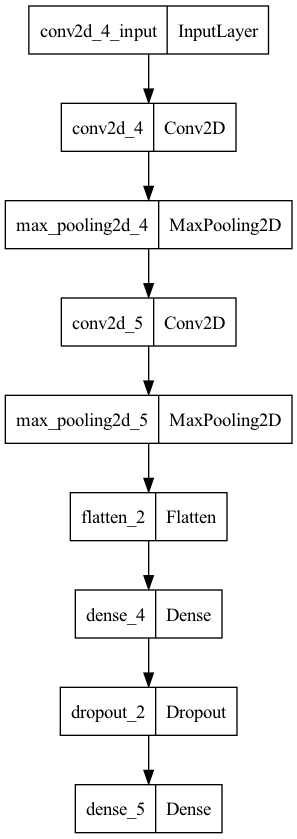

In [41]:
keras.utils.plot_model(model)

네모 상자 안의 내용 중 콜론 왼쪽에는 층의 이름이 쓰여 있고 오른쪽에는 클래스가 나타납니다. 맨 처음에 나오는 InputLayer 클래스는 케라스가 자동으로 추가해 주는 것으로 입력층의 역할을 합니다. plot_model() 함수의 show_shapes 매개변수를 True로 설정하면 이 그림에 입력과 출력의 크기를 표시해 줍니다. 또 to_file 매개변수에 파일 이름을 지정하면 출력한 이미지를 파일로 저장합니다. dpi 매개변수로 해상도를 지정할 수도 있습니다.

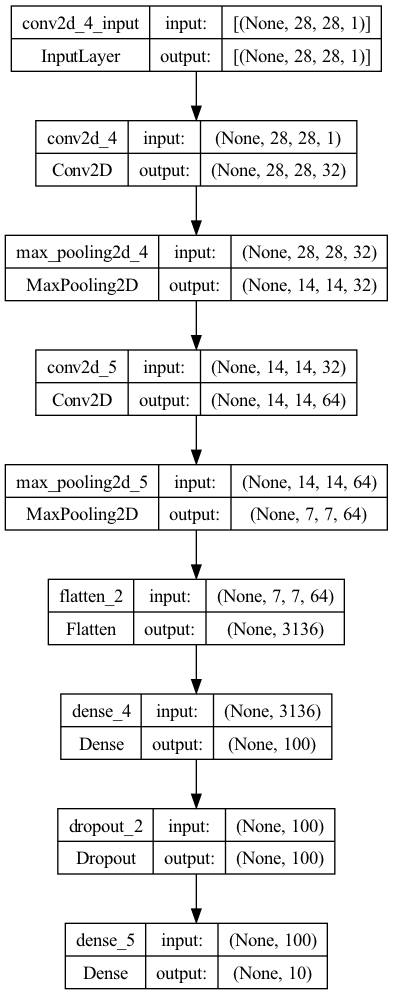

In [42]:
keras.utils.plot_model(model, show_shapes=True)

### 모델 컴파일과 훈련
케라스 API의 장점은 딥러닝 모델의 종류나 구성 방식에 상관없이 컴파일과 훈련 과정이 같다는 점.  
Adam 옵티마이저를 사용하고 ModelCheckpoint 콜백과 EarlyStopping 콜백을 함께 사용해 조기 종료 기법을 구현합니다.

In [43]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.5243 - accuracy: 0.8099 - val_loss: 0.3481 - val_accuracy: 0.8717
Epoch 2/20
   8/1500 [..............................] - ETA: 30s - loss: 0.4694 - accuracy: 0.8320

/Users/seunghalee/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 22s 15ms/step - loss: 0.3509 - accuracy: 0.8751 - val_loss: 0.2831 - val_accuracy: 0.8958
Epoch 3/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3076 - accuracy: 0.8898 - val_loss: 0.2666 - val_accuracy: 0.9004
Epoch 4/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2753 - accuracy: 0.9002 - val_loss: 0.2495 - val_accuracy: 0.9042
Epoch 5/20
1500/1500 [==============================] - 29s 19ms/step - loss: 0.2477 - accuracy: 0.9088 - val_loss: 0.2348 - val_accuracy: 0.9139
Epoch 6/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.2286 - accuracy: 0.9162 - val_loss: 0.2332 - val_accuracy: 0.9130
Epoch 7/20
1500/1500 [==============================] - 28s 18ms/step - loss: 0.2143 - accuracy: 0.9207 - val_loss: 0.2268 - val_accuracy: 0.9168
Epoch 8/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.1950 - accuracy: 0.9276 - val_loss: 0.2185 - val_accura

얼핏 보아도 훈련 세트의 정확도가 이전보다 훨씬 좋아진 것을 알 수 있습니다. 손실 그래프를 그려서 조기 종료가 잘 이루어졌는지 확인해보죠.

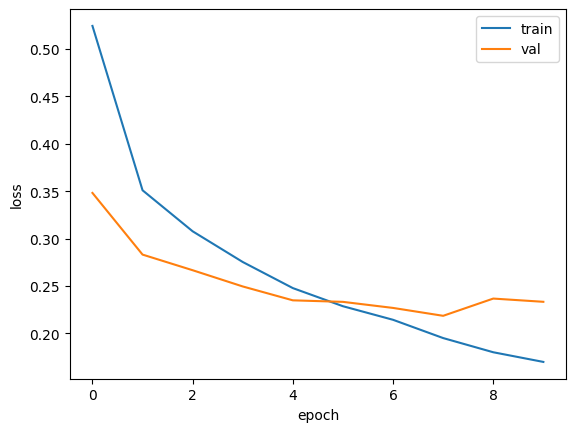

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

검증 세트에 대한 손실이 점차 감소하다가 정체되기 시작하고 훈련 세트에 대한 손실은 점점 더 낮아지고 있습니다. 이 그래프를 기반으로 아홉 번째 에포크를 최적으로 생각할 수 있습니다.  
EarlyStopping 클래스에서 restore_best_weights 매개변수를 True로 지정했으므로 현재 model 객체가 최적의 모델 파라미터로 복원되어 있습니다. 즉 ModelCheckpoing 콜백이 저장한 best-cnn-model.h5 파일을 다시 읽을 필요가 없습니다. 이번에는 세트에 대한 성능을 평가해 보겠습니다.

In [45]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2185 - accuracy: 0.9206


[0.21850797533988953, 0.9205833077430725]

이 결과는 fit() 메서드의 출력 중 아홉 번째 에포크의 출력과 동일합니다. EarlyStopping 콜백이 model 객체를 최상의 모델 파라미터로 잘 복원한 것 같습니다.  
7장에서 잠깐 소개했던 predict() 메서드를 사용해 훈련된 모델을 사용하여 새로운 데이터에 대해 예측을 만들어 보겠습니다. 여기에서는 편의상 검증 세트의 첫 번째 샘플을 처음 본 이미지라고 가정합니다. 맷플롯립에서는 흑백 이미지에 깊이 차원은 없습니다. 따라서 (28, 28, 1) 크기를 (28, 28)로 바꾸어 출력해야 합니다.

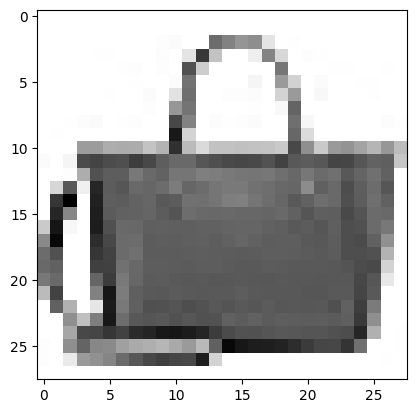

In [46]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

핸드백 이미지 같군요. 모델은 이 이미지에 대해 어떤 예측을 만드는지 확인해 보죠. predict() 메서드는 10개의 클래스에 대한 예측 확률을 출력합니다.  


In [47]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 46ms/step
[[6.5906160e-15 7.2312646e-20 3.3780270e-17 9.2795509e-16 1.4007095e-15
  2.5601354e-14 7.7086207e-15 3.0034179e-14 1.0000000e+00 1.1358744e-16]]


##### 여기서 잠깐! 왜 슬라이싱을 사용했나요?
predict() 메서드에 데이터를 전달할 때 val_scaled[0]로 쓰지 않고 val_scaled[0:1]와 같이 슬라이싱을 사용했음. 케라스의 fit(), predict(), evaluate() 메서드는 모두 입력의 첫 번째 차원이 배치 차원일 것으로 기대합니다. 따라서 샘플 하나를 전달할 때 (28, 28, 1)이 아니라 (1, 28, 28, 1) 크기를 전달해야 하빈다. 배열 슬라이싱은 인덱싱과 다르게 선택된 원소가 하나이더라도 전체 차원이 유지되어 (1, 28, 28, 1) 크기를 만듭니다.

출력 결과를 보면 아홉 번째 값이 1이고 다른 값은 거의 0에 가깝습니다. 이를 막대 그래프로 그리면 확실하게 느낄 수 있습니다.

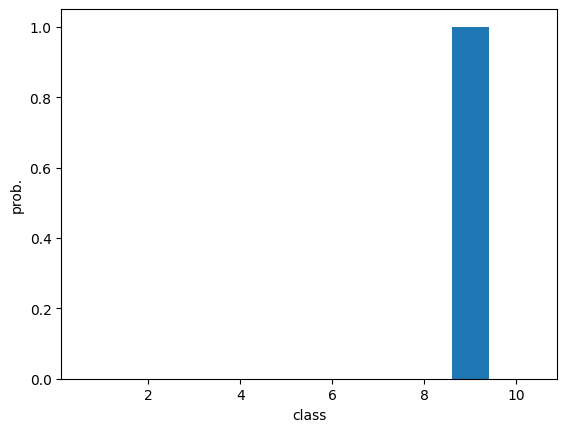

In [48]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

다른 클래스의 값은 사실상 모두 0입니다. 아홉 번째 클래스가 실제로 무엇인지는 패션 MNIST 데이터셋의 정의를 참고해야 합니다. 여기에선느 파이썬에서 레이블을 다루기 위해 리스트로 저장하겠습니다.

In [49]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈',
           '가방', '앵클 부츠']

클래스 리스트가 있으면 레이블을 출력하기 쉽습니다. preds 배열에서 가장 큰 인덱스를 찾아 classes 리스트의 인덱스로 사용하면 됩니다.

In [50]:
import numpy as np
print(classes[np.argmax(preds)])

가방


이 샘플을 '가방'으로 잘 예측한 것 같군요. 합성곱 신경망을 만들고 훈련하여 새로운 샘플에 대해 예측을 수행하는 방법도 알아보았습니다. 마지막으로 맨 처음에 떼어 놓았던 테스트 세트로 합성곱 신경망의 일반화 성능을 가늠해 보겠습니다. 즉 이 모델을 실전에 투입했을 때 얻을 수 있는 예상 성능을 측정해 보죠.  
훈련 세트와 검증 세트에서 했던 것처럼 픽셀값의 범위를 0 ~ 1 사이로 바꾸고 이미지 크기를 (28, 28)에서 (28, 28, 1)로 바꾸겠습니다.

In [51]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

그 다음 evaluate() 메서드로 테스트 세트에 대한 성능을 측정합니다.

In [52]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2390 - accuracy: 0.9159


[0.23904606699943542, 0.9158999919891357]

역시 예상대로 테스트 세트에서의 점수는 검증 세트보다 조금 더 작습니다. 이 모델을 실전에 투입하여 패션 아이템을 분류한다면 약 91%의 성능을 기대할 수 있겠군요!

## 08 - 3 합성곱 신경망의 시각화
이번 장에서 합성곱 신경망에 대해 배우고 패션 MNIST 이미지를 분류하는 방법을 알아보았습니다. 합성곱 신경망은 특히 이미지에 있는 특징을 찾아 압축하는 데 뛰어난 성능을 냅니다. 이번 절에서는 합성곱 층이 이미지에서 어떤 것을 학습했는지 알아보기 위해 합성곱 층의 가중치와 특성 맵을 그림으로 시각화해 보겠습니다.

### 가중치 시각화
합성곱 층은 여러 개의 필터를 사용해 이미지에서 특징을 학습합니다. 각 필터는 커널이라 부르는 가중치와 절편을 가지고 있죠. 가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할을 합니다. 그럼 2절에서 만든 모델이 어떤 가중치를 학습했는지 확인하기 위해 체크포인트 파일을 읽어 들이겠습니다.

In [53]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

케라스 모델에 추가한 층은 layers 속성에 저장되어 있습니다. 이 속성은 파이썬 리스트입니다. model.layers를 출력해 보겠습니다.

In [54]:
model.layers

첫 번째 합성곱 층의 가중치를 조사해 보겠습니다. 층의 가중치와 절편은 층의 weights 속성에 저장되어 있습니다. weights도 파이썬 리스트입니다. 다음 코드에서처럼 layers 속성의 첫 번째 원소를 선택해 weights의 첫 번째 원소 (가중치)와 두 번째 원소 (절편)의 크기를 출력해보죠.

In [55]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


이전 절에서 커널 크기를 (3,3)으로 지정했던 것을 기억. 이 합성곱 층에 전달되는 입력의 깊이가 1이므로 실제 커널 크기는 (3, 3, 1)입니다. 필터 개수는 32개. weights의 첫 번째 원소인 가중치의 크기는 (3, 3, 1, 32)가 되었습니다. weights의 두 번째 원소는 절편의 개수를 나타냅니다. 필터마다 1개의 절편이 있으므로 (32,) 크기가 됩니다.  
weights 속성은 텐서플로의 다차원 배열인 Tensor 클래스의 객체. 여기서는 다루기 쉽도록 numpy() 메서드를 사용해 넘파이 배열로 변환하겠습니다. 그다음 가중치 배열의 평균과 표준편차를 넘파이 mean() 메서드와 std() 메서드로 계산해보죠.

In [56]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.010933199 0.22398046


이 가중치의 평균값은 0에 가깝고 표준편차는 0.27 정도입니다. 나중에 이 값을 훈련하기 전의 가중치와 비교하겠습니다. 이 가중치가 어떤 분포를 가졌는지 직관적으로 이해하기 쉽도록 히스토그램을 그려보겠습니다.

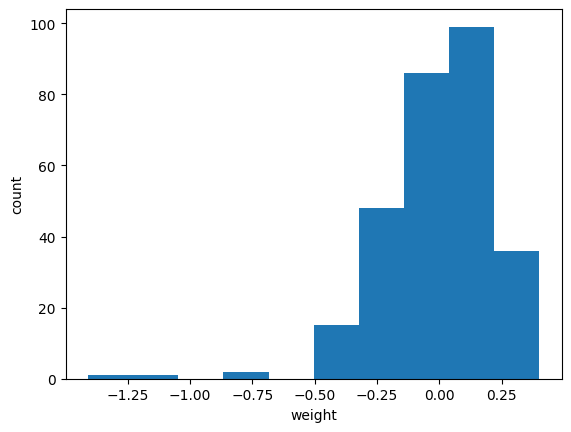

In [57]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

맷플롯립의 hist() 함수에는 히스토그램을 그리기 위해 1차원 배열로 전달해야 합니다. 이를 위해 넘파이 reshape 메서드로 conv_weights 배열을 1개의 열이 있는 배열로 변환했습니다.  
히스토그램을 보면 0을 중심으로 종 모양 분포를 띠고 있는 것을 알 수 있습니다.  
이번에는 32개의 커널을 16개씩 두 줄에 출력해 보겠습니다. 이전 장에서 사용했던 맷플롯립의 subplot() 함수를 사용해 32개의 그래프 영역을 만들고 순서대로 커널을 출력하겠습니다.

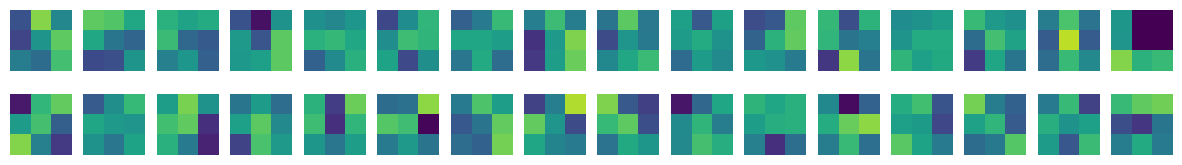

In [59]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

앞에서 conv_weights에 32개의 가중치를 저장했습니다. 이 배열의 마지막 차원을 순회하면서 0부터 i*16 + j번째까지의 가중치 값을 차례대로 출력합니다. 여기에서 i는 행 인덱스이고, j는 열 인덱스. 각각 0 ~ 1, 0 ~ 15까지의 범위를 가집니다. 따라서 conv_weights[:,:,0,0]에서 conv_weights[:,:,0,31]까지 출력합니다.  
imshow() 함수는 배열에 있는 최댓값과 최솟값을 사용해 픽셀의 강도를 표현합니다. 배열의 최댓값이면 가장 밝은 노란색으로 그림. 만약 두 배열을 imshow() 함수로 비교하려면 이런 동작은 바람직하지 않습니다. 어떤 절댓값으로 기준을 정해서 픽셀의 강도를 나타내야 비교하기 좋음. 이를 위해 위 코드에서 vmin과 vmax로 맷플롯립의 컬러맵으로 표현할 범위를 지정했습니다.  
자 이번에는 훈련하지 않은 빈 합성곱 신경망을 만들어 보겠습니다. 이 합성곱 층의 가중치가 위에서 본 훈련한 가중치와 어떻게 다른지 그림으로 비교해 보겠습니다.

In [60]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=
                                          'relu', padding='same', input_shape=(28,28,1)))

그 다음 이 모델의 첫 번째 층(즉 Conv2D 층)의 가중치를 no_training_conv 변수에 저장합니다.

In [61]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


이 가중치의 크기도 앞서 그래프로 출력한 가중치와 같습니다. 동일하게 (3,3) 커널을 가진 필터를 32개 사용했기 때문이죠. 이 가중치의 평균과 표준편차를 확인해 보겠습니다.

In [62]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

7.6265904e-05 0.08230861


이 가중치 배열을 히스토그램으로 표현해 보죠.

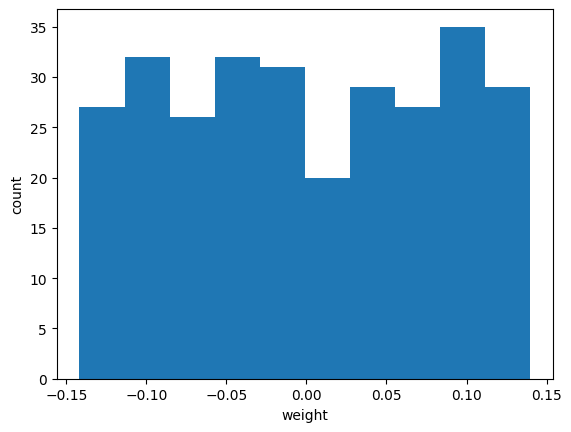

In [63]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

이 그래프는 이전과 확실히 다릅니다. 대부분의 가중치가 -0.15 ~ 0.15 사이에 있고 비교적 고른 분포를 보입니다. 이런 이유는 텐서플로가 신경망의 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 값을 선택했기 때문입니다. 이 가중치 값을 맷플롯립의 imshow() 함수를 사용해 이전처럼 그림으로 출력해 보겠습니다. 학습된 가중치와 비교하기 위해 동일하게 vmin과 vmax를 -0.5와 0.5로 설정.

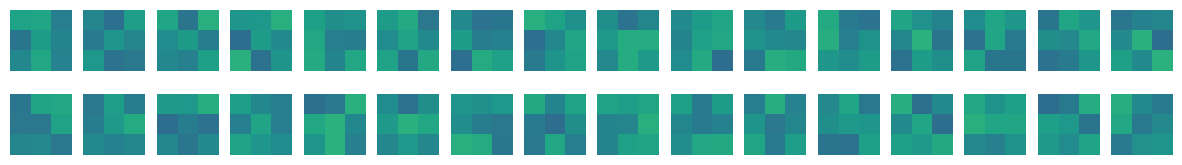

In [64]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5,
                         vmax=0.5)
        axs[i, j].axis('off')
plt.show()

히스토그램에서 보았듯이 전체적으로 가중치가 밋밋하게 초기화되었습니다. 이 그림을 훈련이 끝난 이전 가중치와 비교해 보세요. 합성곱 신경망이 패션 MNIST 데이터셋의 분류 정확도를 높이기 위해 유용한 패턴을 학습했다는 사실을 눈치챌 수 있습니다. 합성곱 신경망의 학습을 시각화하는 두 번째 방법은 합성곱 층에서 출력된 특성 맵을 그려 보는 것입니다. 이를 통해 입력 이미지를 신경망 층이 어떻게 바라보는지 엿볼 수 있습니다.

### 함수형 API
지금까지는 신경망 모델을 만들 때 케라스 Sequential 클래스를 사용했습니다. 이 클래스는 층을 차례대로 쌓은 모델을 만듭니다. 딥러닝에서는 좀 더 복잡한 모델이 많이 있습니다. 입력이 2개일 수도 있고 출력이 2개일 수도 있죠. 이런 경우에는 __함수형 API__ 를 사용합니다. 함수형 API는 케라스의 Model 클래스를 사용하여 모델을 만듭니다. 간단한 예를 들어보죠. 7장에서 만들었던 Dense 층 2개로 이루어진 완전 연결 신경망을 함수형 API로 구현해 보겠습니다. 먼저 2개의 Dense 층 객체를 만듭니다.

In [65]:
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

앞의 코드는 7장에서 보았던 것과 거의 동일합니다. 하지만 다음과 같이 함수로 호출할 수도 있음.  
> hidden = dense1(inputs)

사실 파이썬의 모든 객체는 호출 가능합니다. 케라스의 층은 객체를 함수처럼 호출했을 때 적절히 동작할 수 있도록 미리 준비해 놓았습니다. 앞의 코드를 실행하면 영리하게도 입력값 inputs를 Dense층에 통과시킨 후 출력값 hidden을 만들어 줍니다! 이제 왜 함수형 API라고 부르는지 이해. 그 다음 두 번째 층을 호출합니다. 이때는 첫 번째 층의 출력을 입력으로 사용합니다.  
> outputs = dense2(hidden)

그 다음 inputs와 outputs을 Model 클래스로 연결해 주면 됩니다.  
> model = keras.Model(inputs, outputs)

입력에서 출력까지 층을 호출한 결과를 계속 이어주고 Model 클래스에 입력과 최종 출력을 지정합니다. 그런데 inputs는 어디서 온걸까요? 이전 절에서 plot_model() 함수로 모델의 층을 도식화했을 때 InputLayer 클래스가 맨 처음 나왔던 것을 기억하나요? Sequential 클래스는 InputLayer 클래스를 자동으로 추가하고 호출해 주지만 Model 클래스에서는 우리가 수동으로 만들어서 호출해야 합니다.

다행히 케라스는 InputLayer 클래스 객체를 쉽게 다룰 수 있도록 Input() 함수를 별도로 제공합니다. 입력의 크기를 지정하는 shape 매개변수와 함께 이 함수를 호출하면 InputLayer 클래스 객체를 만들어 출력을 반환해 줍니다.  
> inputs = keras.Input(shape=(784,))

이렇게 모델을 만들게 되면 중간에 다양한 형태로 층을 연결할 수 있습니다. 특성 맵 시각화를 만드는 데 함수형 API가 왜 필요한 것일까요?  
우리가 필요한 것은 첫 번째 Conv2D의 출력. model 객체의 입력과 Conv2D의 출력을 알 수 있다면 이 둘을 연결하여 새로운 모델을 얻을 수 있지 않을까?  
model 객체의 predict() 메서드를 호출하면 입력부터 마지막 층까지 모든 계산을 수행한 후 최종 출력을 반환합니다. 하지만 우리가 필요한 것은 첫 번째 Conv2D 층이 출력한 특성 맵.  
model 객체의 입력은 어떻게 얻을 수 있을까요? 다행히 케라스 모델은 input 속성으로 입력을 참조할 수 있습니다. 즉 model.input으로 이 모델의 입력을 간단히 얻을 수 있습니다.

In [68]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_4_input'), name='conv2d_4_input', description="created by layer 'conv2d_4_input'")


이제 model.input과 model.layers[0].output을 연결하는 새로운 conv_acti 모델을 만들 수 있습니다.

In [69]:
conv_acti = keras.Model(model.input, model.layers[0].output)

model 객체의 predict() 메서드를 호출하면 최종 출력층의 확률을 반환합니다. 하지만 conv_acti의 predict() 메서드를 호출하면 첫 번째 Conv2D의 출력을 반환할 것입니다.

### 특성 맵 시각화
케라스로 패션 MNIST 데이터셋을 읽은 후 훈련 세트에 있는 첫 번째 샘플을 그려 보겠습니다.

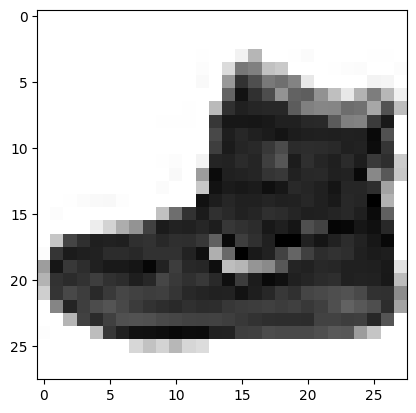

In [70]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

앵클 부츠군요. 이 샘플을 conv_acti 모델에 주입하여 Conv2D 층이 만드는 특성 맵을 출력해 보겠습니다. 앞에서도 설명했지만 predict() 메서드는 항상 입력의 첫 번째 차원이 배치 차원일 것으로 기대합니다. 하나의 샘플을 전달하더라도 꼭 첫 번째 차원을 유지해야 합니다. 이를 위해 슬라이싱 연산자를 사용해 첫 번째 샘플을 선택합니다. 그다음에 (784,) 크기를 (28,28,1) 크기로 변경하고 255로 나눕니다.

In [72]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 15ms/step


conv_acti.predict() 메서드가 출력한 feature_maps의 크기를 확인해보죠.

In [73]:
print(feature_maps.shape)

(1, 28, 28, 32)


이제 앞에서와 같이 맷플롯립의 imshow() 함수로 이 특성 맵을 그려 보겠습니다. 총 32개의 특성 맵이 있으므로 4개의 행으로 나누어 그려 보겠습니다.

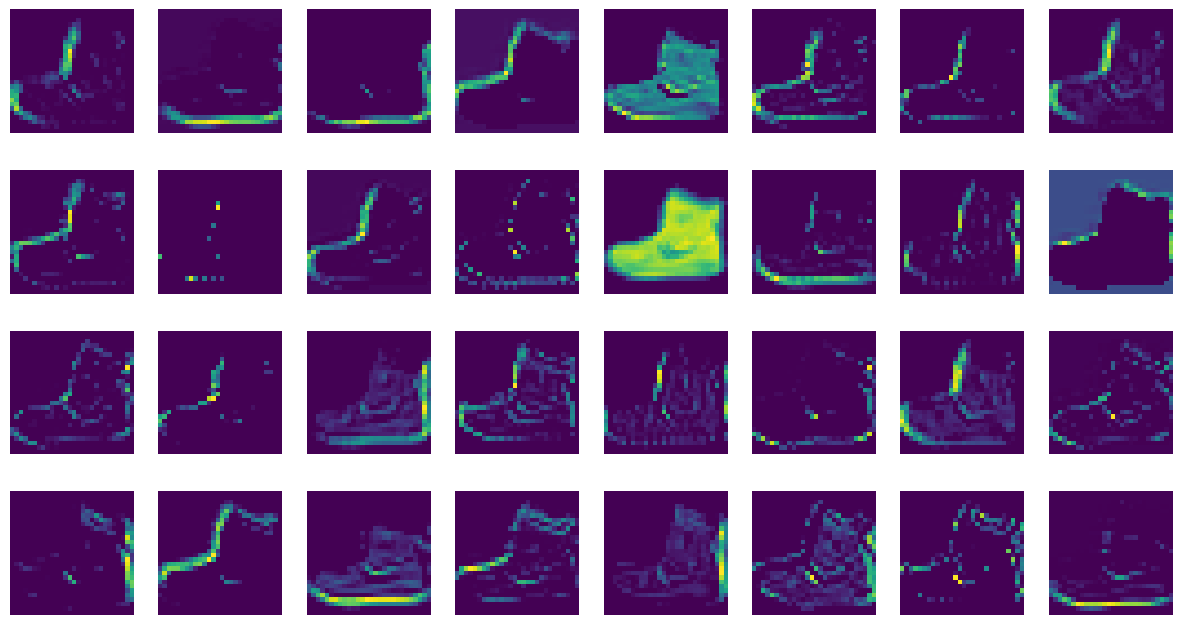

In [74]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()

이 특성 맵은 32개의 필터로 인해 입력 이미지에서 강하게 활성화된 부분을 보여줍니다. 위의 그림에서 첫 번째 필터는 오른쪽에 있는 수직선을 감지합니다. 첫 번째 특성 맵은 이 필터가 감지한 수직선이 강하게 활성화되었습니다. 세 번째 필터는 전체적으로 밝은색이므로 전면이 모두 칠해진 영역을 감지합니다.  
이와 반대로 마지막 필터는 전체적으로 낮은 음수 값입니다. 이 필터와 큰 양수가 곱해지면 더 큰 음수가 되고 배경처럼 0에 가까운 값과 곱해지면 작은 음수가 될 것입니다.  
두 번째 합성곱 층이 만든 특성 맵도 같은 방식으로 확인할 수 있습니다.

In [75]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

그다음 첫 번째 샘플을 conv2_acti 모델의 predict() 메서드에 전달합니다.

In [76]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 47ms/step


In [77]:
print(feature_maps.shape)

(1, 14, 14, 64)


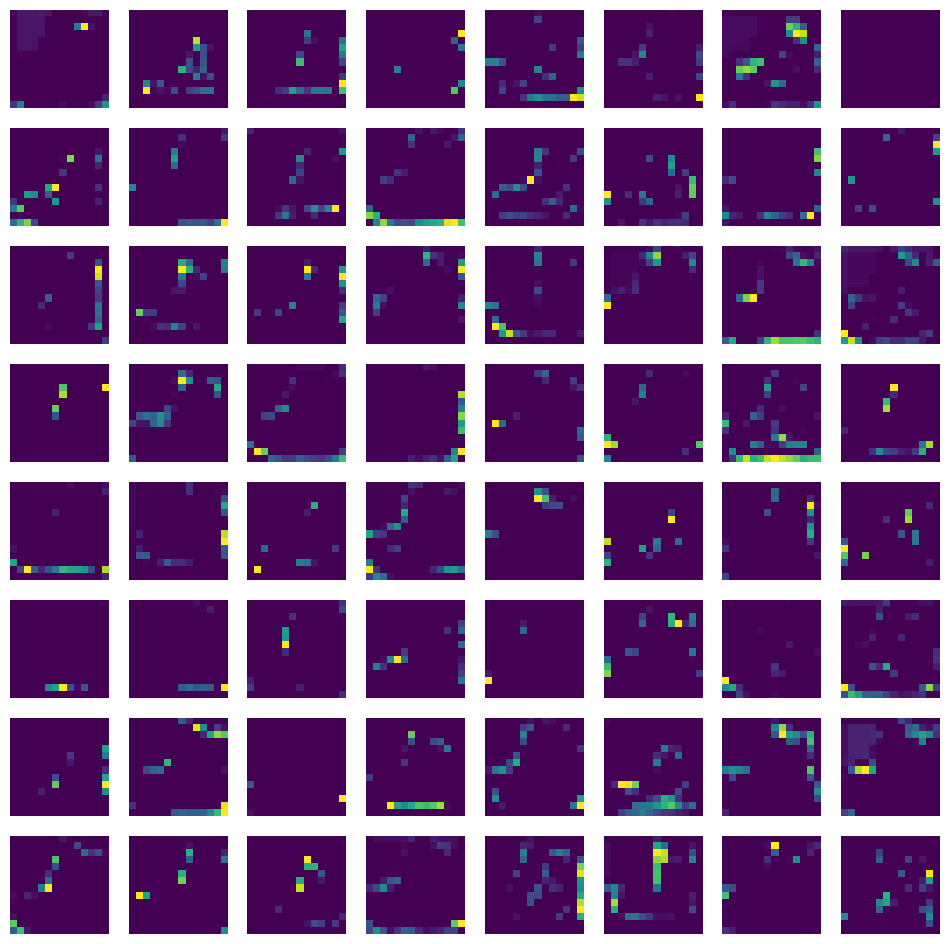

In [78]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()

두 번째 합성곱 층의 필터 크기는 (3, 3, 32). 이런 현상은 합성곱 층을 많이 쌓을수록 심해집니다. 이를 바꾸어 생각하면 합성곱 신경망의 앞부분에 있는 합성곱 층은 이미지의 시각적인 정보를 감지하고 뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습한다고 볼 수 있습니다.